<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap03/3_3_Shallow_Network_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.3 -- Shallow network regions**

The purpose of this notebook is to compute the maximum possible number of linear regions as seen in figure 3.9 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Imports math library
import math

The number of regions $N$ created by a shallow neural network with $D_i$ inputs and $D$ hidden units is given by Zaslavsky's formula:

\begin{equation}N = \sum_{j=0}^{D_{i}}\binom{D}{j}=\sum_{j=0}^{D_{i}} \frac{D!}{(D-j)!j!} \end{equation} <br>



In [2]:
def number_regions(Di, D):
  # TODO -- implement Zaslavsky's formula
  # You can use math.comb() https://www.w3schools.com/python/ref_math_comb.asp
  # Replace this code
  N = 1;

  return N

In [3]:
# Calculate the number of regions for 2D input (Di=2) and 3 hidden units (D=3) as in figure 3.8j
N = number_regions(2, 3)
print(f"Di=2, D=3, Number of regions = {int(N)}, True value = 7")

Di=2, D=3, Number of regions = 1, True value = 7


In [4]:
# Calculate the number of regions for 10D input (Di=10) and 50 hidden units (D=50)
N = number_regions(10, 50)
print(f"Di=10, D=50, Number of regions = {int(N)}, True value = 13432735556")

Di=10, D=50, Number of regions = 1, True value = 13432735556


This works but there is a complication. If the number of hidden units $D$ is fewer than the number of input dimensions $D_i$ , the formula will fail.  When this is the case, there are just $2^D$ regions (see figure 3.10 to understand why).

Let's demonstrate this:

In [5]:
# Depending on how you implemented it, the calculation may fail when $D_i > D$ (not to worry...)
try:
  N = number_regions(10, 8)
  print(f"Di=10, D=8, Number of regions = {int(N)}, True value = 256")
except Exception as error:
    print("An exception occurred:", error)


Di=10, D=8, Number of regions = 1, True value = 256


In [6]:
# Let's do the calculation properly when D<Di (see figure 3.10 from the book)
D = 8; Di = 10
N = np.power(2,D)
# We can equivalently do this by calling number_regions with the D twice
# Think about why this works
N2 = number_regions (D,D)
print(f"Di=10, D=8, Number of regions = {int(N)}, Number of regions = {int(N2)}, True value = 256")

Di=10, D=8, Number of regions = 256, Number of regions = 1, True value = 256


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


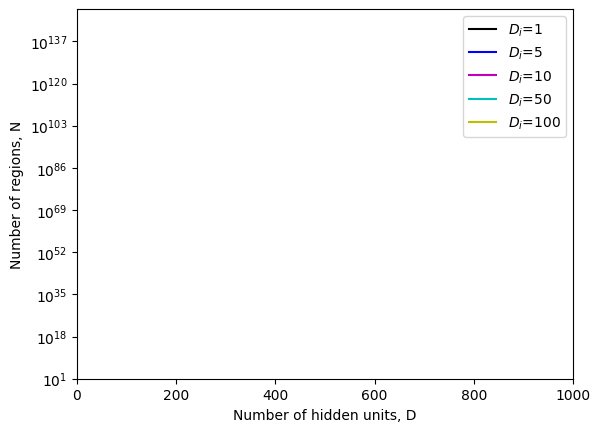

In [7]:
# Now let's plot the graph from figure 3.9a
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 1000))
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for D in range(1000):
        regions[c_dim, D] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(regions[0,:],'k-')
ax.semilogy(regions[1,:],'b-')
ax.semilogy(regions[2,:],'m-')
ax.semilogy(regions[3,:],'c-')
ax.semilogy(regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of hidden units, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,1000])
plt.ylim([1e1,1e150])
plt.show()

In [8]:
# Now let's compute and plot the number of regions as a function of the number of parameters as in figure 3.9b
# First let's write a function that computes the number of parameters as a function of the input dimension and number of hidden units (assuming just one output)

def number_parameters(D_i, D):
  # TODO -- replace this code with the proper calculation
  N = 1

  return N ;

In [9]:
# Now let's test the code
N = number_parameters(10, 8)
print(f"Di=10, D=8, Number of parameters = {int(N)}, True value = 97")

Di=10, D=8, Number of parameters = 1, True value = 97


Counting regions for 1 input dimensions
Counting regions for 5 input dimensions
Counting regions for 10 input dimensions
Counting regions for 50 input dimensions
Counting regions for 100 input dimensions


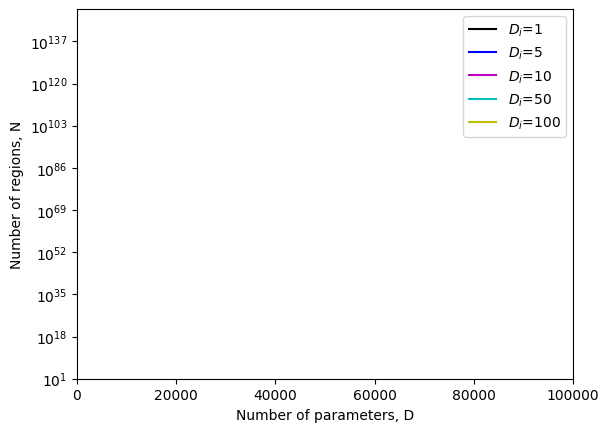

In [10]:
# Now let's plot the graph from figure 3.9a (takes ~1min)
dims = np.array([1,5,10,50,100])
regions = np.zeros((dims.shape[0], 200))
params = np.zeros((dims.shape[0], 200))

# We'll compute the five lines separately this time to make it faster
for c_dim in range(dims.shape[0]):
    D_i = dims[c_dim]
    print (f"Counting regions for {D_i} input dimensions")
    for c_hidden in range(1, 200):
        # Iterate over different ranges of number hidden variables for different input sizes
        D = int(c_hidden * 500 / D_i)
        params[c_dim, c_hidden] =  D_i * D +D + D +1
        regions[c_dim, c_hidden] = number_regions(np.min([D_i,D]), D)

fig, ax = plt.subplots()
ax.semilogy(params[0,:], regions[0,:],'k-')
ax.semilogy(params[1,:], regions[1,:],'b-')
ax.semilogy(params[2,:], regions[2,:],'m-')
ax.semilogy(params[3,:], regions[3,:],'c-')
ax.semilogy(params[4,:], regions[4,:],'y-')
ax.legend(['$D_i$=1', '$D_i$=5', '$D_i$=10', '$D_i$=50', '$D_i$=100'])
ax.set_xlabel("Number of parameters, D")
ax.set_ylabel("Number of regions, N")
plt.xlim([0,100000])
plt.ylim([1e1,1e150])
plt.show()
